pt라는 256*256 numpy 2차원 배열을 계속해서 수정해나가는 방법으로 코드를 구성했습니다.<br>
따라서 담은 상자에 대한 정보는 따로 저장히지 않았습니다. <br>
남은 자리에 넣을 수 있는 상자 계속 넣는 방법도 안 만들었습니다. <br>
imshow 색깔 안이뻐서 슬픕니다. <br>
sort 안 하고 출력 한 셀에만 주석을 열심히 달았고, 다른 셀은 주석 열심히 안 달았습니다. <br><br>
마인즈랩, 뷰노 등 다른 팀들이랑 공유는 매우매우 찬성입니다 :)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
testCase = [11, 21, 43, 39, 13, 52, 35, 25, 28, 20, 66, 55, 54, 62, 50, 61, 49, 16, 60, 51, 39, 27, 54, 62, 65, 13, 34, 50, 48, 63, 19, 41, 18, 61, 23, 51, 39, 58, 35, 14, 35, 31, 67, 58, 25, 24, 58, 63, 59, 57, 69, 57, 34, 28, 61, 30, 18, 57, 10, 26, 42, 66, 31, 50, 63, 13, 42, 10, 57, 63, 61, 54, 50, 53, 20, 54, 66, 31, 48, 35, 28, 25, 37, 54, 32, 50, 42, 49, 62, 37, 31, 24, 63, 44, 66, 29, 25, 51, 52, 17, 67, 55, 27, 48, 23, 39, 38, 41, 46, 15, 46, 68, 24, 41, 38, 20, 33, 42, 12, 12, 51, 31, 53, 41, 25, 28, 39, 69, 61, 12, 55, 59, 35, 60, 13, 60, 22, 41, 60, 68, 28, 33, 31, 60, 27, 48, 38, 60, 19, 63, 28, 50, 24, 31, 42, 38, 11, 17, 50, 36, 27, 59, 42, 25, 16, 61, 35, 19, 32, 67, 40, 53, 33, 42, 15, 40, 62, 23, 42, 19, 57, 42, 43, 59, 12, 10, 45, 68, 16, 15, 15, 34, 67, 33, 27, 54, 53, 64, 18, 22];

In [65]:
for i in range(len(testCase)): # 너무 큰 애들을 잡아줍니다..
    if testCase[i] >15:
        testCase[i]-=5

In [19]:
# testCase를 d라는 딕셔너리에 담는 과정! 
# 나중에 d로 DataFrame 만들거임
caseWidth = list()
caseHeight = list()
caseLen = len(testCase)
for i in range(0, len(testCase),2):
    caseWidth.append(testCase[i])
    caseHeight.append(testCase[i+1])
    # print(testCase[i], testCase[i+1])
d = {'Width':caseWidth, 'Height':caseHeight}

In [7]:
# numpy 배열을 바꿔주는 함수
def drawRect(arr,wid, hei,xlocation, ylocation):
    for i in range(wid): # 내부를 칠하는 반복문
        for j in range(hei):
            arr[xlocation+i][ylocation+j]=25
    for i in range(wid+1): # 윗변, 아랫변을 칠하는 반복문
        arr[xlocation+i][ylocation]=150
        arr[xlocation+i][ylocation+hei]=150
    for i in range(hei+1): # 좌변, 우변을 칠하는 반복문
        arr[xlocation][ylocation+i]=150
        arr[xlocation+wid][ylocation+i]=150
        
    return arr

Sort 없이 출력

pointer location -> i :   0  x :  11  y :  21 		rect size : width =  11  height =  21
pointer location -> i :   1  x :  50  y :  43 		rect size : width =  39  height =  43
pointer location -> i :   2  x :  63  y :  52 		rect size : width =  13  height =  52
pointer location -> i :   3  x :  88  y :  52 		rect size : width =  25  height =  35
pointer location -> i :   4  x : 108  y :  52 		rect size : width =  20  height =  28
pointer location -> i :   5  x : 163  y :  66 		rect size : width =  55  height =  66
pointer location -> i :   6  x : 217  y :  66 		rect size : width =  54  height =  62
pointer location -> i :   7  x :  50  y : 127 		rect size : width =  50  height =  61
pointer location -> i :   8  x :  66  y : 127 		rect size : width =  16  height =  49
pointer location -> i :   9  x : 117  y : 127 		rect size : width =  51  height =  60
pointer location -> i :  10  x : 144  y : 127 		rect size : width =  27  height =  39
pointer location -> i :  11  x : 198  y : 128 		rect s

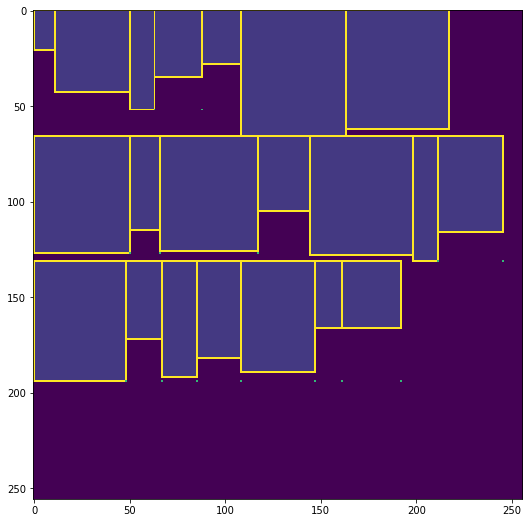

In [8]:
pt = np.zeros([256,256])
x = 'x_pointer'
y = 'y_pointer'
pointer={x:0,y:0} # 포인터 딕셔너리
RectDataFrame = pd.DataFrame(d) # RectDataFrame 생성 
RectDataFrame['Area'] = RectDataFrame['Width']*RectDataFrame['Height'] # 적재율을 계산하기 위한 Rect 넓이 계산 
# Height가 Width보다 크면 회전시킴
tmp = RectDataFrame[RectDataFrame['Width']>RectDataFrame['Height']].index 
for i in tmp: 
    RectDataFrame['Width'][i], RectDataFrame['Height'][i] = RectDataFrame['Height'][i], RectDataFrame['Width'][i] # Swap
upp = 0 # 층을 담는 변수! 처음에는 0
for i in range(caseLen):
    if pointer[y]+RectDataFrame['Height'][i]<256: # y보다 더 크면 죽어요!
        if pointer[x]+RectDataFrame['Width'][i]<256: # pointer[x] + Width가 256보다 크면 층을 바꿈
            drawRect(pt, RectDataFrame['Width'][i], RectDataFrame['Height'][i], pointer[x],upp) # 일단 그림을 그림
            pointer[x]+=RectDataFrame['Width'][i] # pointer[x]값을 이동
            if pointer[y]<RectDataFrame['Height'][i]+upp: # pointer[y]값이 새로운 Height보다 낮으면 pointer[y]값을 바꿔줌
                pointer[y] = upp+RectDataFrame['Height'][i] 
                
            pt[pointer[x]][pointer[y]]=100 # pointer 좌표 점 찍기
            
        # pointer[x]+ Width가 256보다 커져서 새로운 층으로 왔어요
        else:
            if pointer[y]+RectDataFrame['Height'][i]>256: # 너무 밑으로 내려올 수도 있어요. 밑에 자리가 없으면 죽어요! (사실 그럴 일은 거의 없음!)
                # 얼마나 큰 애가 틀어오려다가 실패했는지 출력
                print('\nBREAK POINT!!!\t', 'trect size : width = %3d  height = %3d'%(RectDataFrame['Width'][i], RectDataFrame['Height'][i]))
                # 담은 상자 넓이 / 256*256
                print('적재율 :', RectDataFrame['Area'][0:i].sum()/(256 * 256)) 
                break
            upp = pointer[y] # 층을 pointer[y]의 값으로 바꿔줌
            pointer[x] =0 # pointer[x] 값을 초기화
            drawRect(pt, RectDataFrame['Width'][i], RectDataFrame['Height'][i], pointer[x], upp) # 일단 그림을 그림
            if pointer[y]<RectDataFrame['Height'][i]+upp: # pointer[y]값이 새로운 Height보다 낮으면 pointer[y]값을 바꿔줌. 근데 무조건 바뀜... 
                pointer[y] = upp+RectDataFrame['Height'][i]
            
            pointer[x]+=RectDataFrame['Width'][i] # pointer[x]값을 이동
            pt[pointer[x]][pointer[y]]=100 # pointer 좌표 점 찍기
    else:
        # 얼마나 큰 애가 틀어오려다가 실패했는지 출력
        print('\nBREAK POINT!!!\t', 'trect size : width = %3d  height = %3d'%(RectDataFrame['Width'][i], RectDataFrame['Height'][i]))
        # 담은 상자 넓이 / 256*256
        print('적재율 :', RectDataFrame['Area'][0:i].sum()/(256 * 256))
        break
    # i번째 상자를 넣은 후의 pointer와 i번째 상자의 width와 height를 출력
    print ('pointer location -> i : %3d  x : %3d  y : %3d'%(i,pointer[x],pointer[y]), '\t\trect size : width = %3d  height = %3d'%(RectDataFrame['Width'][i], RectDataFrame['Height'][i]))

#그림을 그려요
plt.figure(figsize=(9,9))
plt.imshow(pt.transpose()) # 전치를 해줘야지 우리가 익숙한 그림으로 바뀝니다.
plt.show()

In [37]:
print(RectDataFrame['Height'].to_list())

[21, 43, 52, 35, 28, 66, 62, 61, 49, 60, 39, 62, 65, 50, 63, 41, 61, 51, 58, 35, 35, 67, 25, 63, 59, 69, 34, 61, 57, 26, 66, 50, 63, 42, 63, 61, 53, 54, 66, 48, 28, 54, 50, 49, 62, 31, 63, 66, 51, 52, 67, 48, 39, 41, 46, 68, 41, 38, 42, 12, 51, 53, 28, 69, 61, 59, 60, 60, 41, 68, 33, 60, 48, 60, 63, 50, 31, 42, 17, 50, 59, 42, 61, 35, 67, 53, 42, 40, 62, 42, 57, 59, 12, 68, 16, 34, 67, 54, 64, 22]


작은 것 부터 출력

pointer location -> i :   0  x :  10  y :  10 		rect size : width =  10  height =  10
pointer location -> i :   1  x :  20  y :  10 		rect size : width =  10  height =  10
pointer location -> i :   2  x :  32  y :  12 		rect size : width =  12  height =  12
pointer location -> i :   3  x :  44  y :  12 		rect size : width =  12  height =  12
pointer location -> i :   4  x :  57  y :  13 		rect size : width =  13  height =  13
pointer location -> i :   5  x :  70  y :  13 		rect size : width =  13  height =  13
pointer location -> i :   6  x :  84  y :  14 		rect size : width =  14  height =  14
pointer location -> i :   7  x :  99  y :  15 		rect size : width =  15  height =  15
pointer location -> i :   8  x : 114  y :  15 		rect size : width =  15  height =  15
pointer location -> i :   9  x : 130  y :  16 		rect size : width =  16  height =  16
pointer location -> i :  10  x : 147  y :  17 		rect size : width =  17  height =  17
pointer location -> i :  11  x : 164  y :  17 		rect s

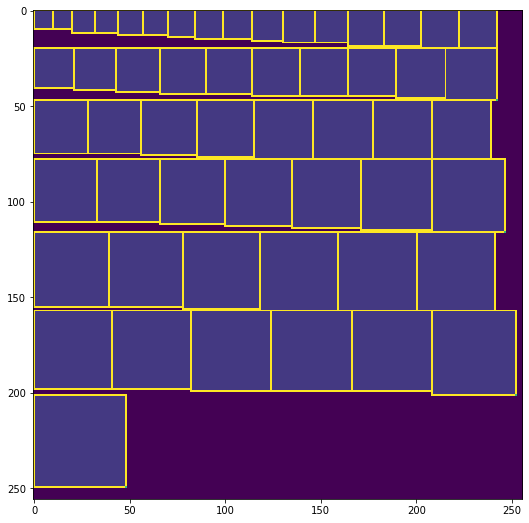

In [68]:
pt = np.zeros([256,256])
x = 'x_pointer'
y = 'y_pointer'
pointer={x:0,y:0}
RectDataFrame = pd.DataFrame(d) # RectDataFrame 생성
RectDataFrame['Area'] = RectDataFrame['Width']*RectDataFrame['Height']
tmp = RectDataFrame[RectDataFrame['Width']>RectDataFrame['Height']].index
for i in tmp:
    RectDataFrame['Width'], RectDataFrame['Height'] = RectDataFrame['Height'], RectDataFrame['Width']
# Width가 작은 순서로 정렬
RectDataFrame.sort_values('Width',inplace=True)
RectDataFrame.reset_index(drop=True,inplace=True)
upp = 0
for i in range(len(RectDataFrame)):
    if pointer[y]+RectDataFrame['Height'][i]<256: # y보다 더 크면 죽어요!
        if pointer[x]+RectDataFrame['Width'][i]<256: # width를 넘겼을 때 
            drawRect(pt, RectDataFrame['Width'][i], RectDataFrame['Height'][i], pointer[x],upp)
            pointer[x]+=RectDataFrame['Width'][i]
            if pointer[y]<RectDataFrame['Height'][i]+upp: # 포인터가 새로운 Height보다 더 낮으면 포인터를 높임
                pointer[y] = upp+RectDataFrame['Height'][i]
                
            pt[pointer[x]][pointer[y]]=100 # 점 찍기
        else:
            if pointer[y]+RectDataFrame['Height'][i]>256: # 새로 내려왔는데 너무 밑으로 내려올 수도 있어요
                print('\nBREAK POINT!!!\t', 'trect size : width = %3d  height = %3d'%(RectDataFrame['Width'][i], RectDataFrame['Height'][i]))
                print('적재율 :', RectDataFrame['Area'][0:i].sum()/(256 * 256))
                continue
            upp = pointer[y]
            pointer[x] =0
            drawRect(pt, RectDataFrame['Width'][i], RectDataFrame['Height'][i], pointer[x], upp)
            if pointer[y]<RectDataFrame['Height'][i]+upp: # 포인터가 새로운 Height보다 더 낮으면 포인터를 높임
                pointer[y] = upp+RectDataFrame['Height'][i]
                
            pointer[x]+=RectDataFrame['Width'][i]
            pt[pointer[x]][pointer[y]]=100 # 점 찍기
    else:
        continue
        print('\nBREAK POINT!!!\t', 'trect size : width = %3d  height = %3d'%(RectDataFrame['Width'][i], RectDataFrame['Height'][i]))
        print('적재율 :', RectDataFrame['Area'][0:i].sum()/(256 * 256))
        
    print ('pointer location -> i : %3d  x : %3d  y : %3d'%(i,pointer[x],pointer[y]), '\t\trect size : width = %3d  height = %3d'%(RectDataFrame['Width'][i], RectDataFrame['Height'][i]))
plt.figure(figsize=(9,9))
plt.imshow(pt.transpose())
plt.show()

큰 것부터 출력

pointer location -> i :   0  x :  60  y :  68 		rect size : width =  60  height =  68
pointer location -> i :   1  x : 118  y :  68 		rect size : width =  58  height =  63
pointer location -> i :   2  x : 176  y :  68 		rect size : width =  58  height =  67
pointer location -> i :   3  x : 233  y :  68 		rect size : width =  57  height =  59
pointer location -> i :   4  x :  57  y : 137 		rect size : width =  57  height =  69
pointer location -> i :   5  x : 114  y : 137 		rect size : width =  57  height =  63
pointer location -> i :   6  x : 169  y : 137 		rect size : width =  55  height =  67
pointer location -> i :   7  x : 224  y : 137 		rect size : width =  55  height =  66
pointer location -> i :   8  x :  55  y : 196 		rect size : width =  55  height =  59
pointer location -> i :  14  x : 105  y : 196 		rect size : width =  50  height =  53
pointer location -> i :  20  x : 148  y : 196 		rect size : width =  43  height =  59
pointer location -> i :  21  x : 190  y : 196 		rect s

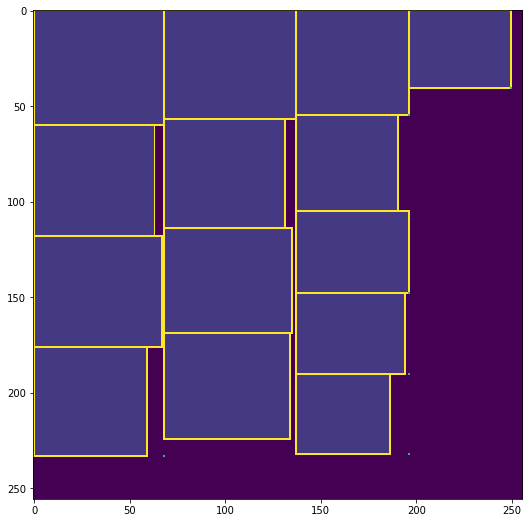

In [67]:
pt = np.zeros([256,256])
x = 'x_pointer'
y = 'y_pointer'
pointer={x:0,y:0}

RectDataFrame = pd.DataFrame(d) # RectDataFrame 생성
RectDataFrame['Area'] = RectDataFrame['Width']*RectDataFrame['Height']
tmp = RectDataFrame[RectDataFrame['Width']>RectDataFrame['Height']].index 
for i in tmp: 
    RectDataFrame['Width'][i], RectDataFrame['Height'][i] = RectDataFrame['Height'][i], RectDataFrame['Width'][i] # Swap
# Width가 큰 순서로 정렬
RectDataFrame.sort_values('Width',inplace=True, ascending=False)
RectDataFrame.reset_index(drop=True,inplace=True)
upp = 0
for i in range(len(RectDataFrame)):
    if pointer[y]+RectDataFrame['Height'][i]<256: # y보다 더 크면 죽어요!
        if pointer[x]+RectDataFrame['Width'][i]<256: # width를 넘겼을 때 
            drawRect(pt, RectDataFrame['Width'][i], RectDataFrame['Height'][i], pointer[x],upp)
            pointer[x]+=RectDataFrame['Width'][i]
            if pointer[y]<RectDataFrame['Height'][i]+upp: # 포인터가 새로운 Height보다 더 낮으면 포인터를 높임
                pointer[y] = upp+RectDataFrame['Height'][i]
                
            pt[pointer[x]][pointer[y]]=100 # 점 찍기
        else:
            if pointer[y]+RectDataFrame['Height'][i]>256: # 새로 내려왔는데 너무 밑으로 내려올 수도 있어요
                print('\nBREAK POINT!!!\t', 'trect size : width = %3d  height = %3d'%(RectDataFrame['Width'][i], RectDataFrame['Height'][i]))
                print('적재율 :', RectDataFrame['Area'][0:i].sum()/(256 * 256))
                continue
            upp = pointer[y]
            pointer[x] =0
            drawRect(pt, RectDataFrame['Width'][i], RectDataFrame['Height'][i], pointer[x], upp)
            if pointer[y]<RectDataFrame['Height'][i]+upp: # 포인터가 새로운 Height보다 더 낮으면 포인터를 높임
                pointer[y] = upp+RectDataFrame['Height'][i]
                
            pointer[x]+=RectDataFrame['Width'][i]
            pt[pointer[x]][pointer[y]]=100 # 점 찍기
    else:
        continue
        print('\nBREAK POINT!!!\t', 'trect size : width = %3d  height = %3d'%(RectDataFrame['Width'][i], RectDataFrame['Height'][i]))
        print('적재율 :', RectDataFrame['Area'][0:i].sum()/(256 * 256))
        
    print ('pointer location -> i : %3d  x : %3d  y : %3d'%(i,pointer[x],pointer[y]), '\t\trect size : width = %3d  height = %3d'%(RectDataFrame['Width'][i], RectDataFrame['Height'][i]))
print('\nBREAK POINT!!!\t', 'trect size : width = %3d  height = %3d'%(RectDataFrame['Width'][i], RectDataFrame['Height'][i]))
print('적재율 :', RectDataFrame['Area'][0:i].sum()/(256 * 256))
plt.figure(figsize=(9,9))
# for i in range(256):
#     for j in range(256):
#         pt2[i][j][0] = pt2[i][j][1] = pt2[i][j][2] = pt[j][i]
plt.imshow(pt)
plt.show()